* Nama : Putra Nindya Yuwana
* NIM : 2241720089
* Kelas : TI-3E / 22

# PRAKTIKUM 1

## KMeans

In [ ]:
#Persiapan data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- pandas: Digunakan untuk memanipulasi data dalam bentuk tabel (DataFrame).
- numpy: Digunakan untuk perhitungan numerik (matematika dan array). matplotlib.
- pyplot: Digunakan untuk membuat grafik atau visualisasi data.
- KMeans: Algoritma K-Means Clustering dari scikit-learn untuk membagi data ke dalam beberapa kluster.

- df = pd.read_csv('Iris.csv'): Membaca file CSV bernama Iris.csv dan menyimpannya dalam variabel df sebagai DataFrame.
- df.head(): Menampilkan 5 baris pertama dari dataset df untuk melihat struktur data dan beberapa sampel datanya.

In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

- X = df.iloc[:, 1:-1], X menyimpan data fitur (variabel independen) dari dataset., df.iloc[:, 1:-1] berarti mengambil semua baris (:) dan kolom dari indeks ke-1 sampai kolom terakhir, kecuali kolom terakhir.
- y = df.iloc[:, -1], y menyimpan kolom target (variabel dependen) atau label kelas. df.iloc[:, -1] berarti mengambil semua baris (:) dan hanya kolom terakhir, yang biasanya merupakan kolom label (dalam hal ini mungkin spesies bunga iris seperti setosa, versicolor, atau virginica).

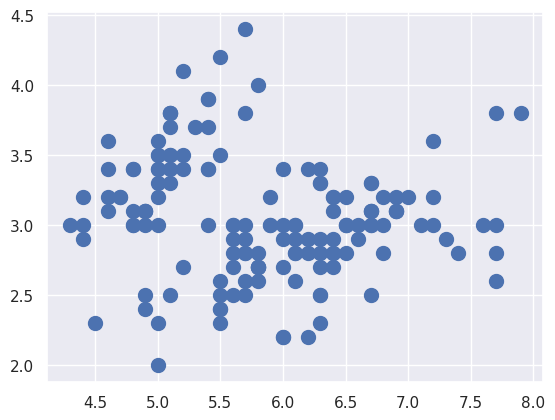

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

- plt.scatter(): Fungsi dari matplotlib untuk membuat scatter plot (grafik sebar).
- X.iloc[:, 0]: Mengambil nilai dari kolom pertama fitur X (dalam hal ini Sepal Length).
- X.iloc[:, 1]: Mengambil nilai dari kolom kedua fitur X (dalam hal ini Sepal Width).
- s = 100: Mengatur ukuran titik pada grafik sebar menjadi 100.

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

- from sklearn.cluster import KMeans: Mengimpor algoritma KMeans dari scikit-learn untuk melakukan klasterisasi.
- cl_kmeans = KMeans(n_clusters=2) KMeans(n_clusters=2): Membuat model KMeans dengan 2 kluster (artinya, data akan dikelompokkan menjadi 2 kluster). n_clusters=2: Jumlah kluster yang ingin dibuat.
- y_kmeans = cl_kmeans.fit_predict(X)
  - fit_predict(X): Model KMeans dilatih menggunakan data fitur X, lalu model juga langsung melakukan prediksi untuk mengelompokkan data ke dalam kluster.
  - y_kmeans: Hasil prediksi dari model, yang berisi label kluster (misalnya, kluster 0 atau kluster 1 untuk setiap data).

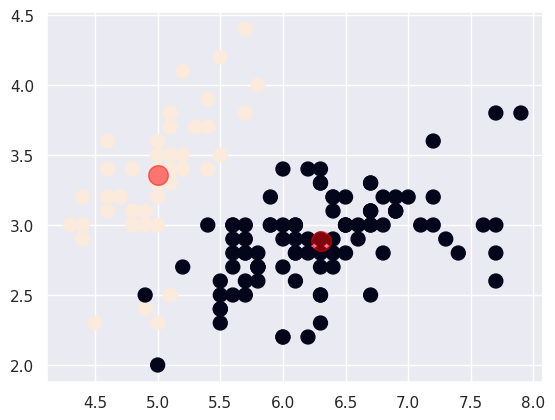

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)
- plt.scatter(): Membuat scatter plot untuk melihat distribusi data.
- X.iloc[:, 0]: Mengambil data dari kolom pertama (Sepal Length).
- X.iloc[:, 1]: Mengambil data dari kolom kedua (Sepal Width).
- s = 100: Ukuran titik pada plot diatur menjadi 100.
- c=y_kmeans: Memberi warna berbeda pada titik berdasarkan kluster yang dihasilkan oleh KMeans.

centers = cl_kmeans.cluster_centers_; plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
- centers = cl_kmeans.cluster_centers_: Mendapatkan koordinat centroid dari masing-masing kluster yang dihitung oleh KMeans.
- plt.scatter(): Membuat scatter plot untuk centroid.
- centers[:, 0]: Mengambil koordinat Sepal Length dari centroid untuk kluster.
- centers[:, 1]: Mengambil koordinat Sepal Width dari centroid.
- c='red': Centroid diberi warna merah.
- s=200: Ukuran titik centroid diatur lebih besar, yaitu 200, untuk menonjolkannya.
- alpha=0.5: Tingkat transparansi centroid diatur menjadi 0.5 agar centroid tampak lebih jelas tetapi tetap terlihat transparan.

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


SSE (Sum of Squared Errors): Adalah ukuran seberapa baik kluster yang dihasilkan oleh KMeans. Semakin kecil nilai SSE, semakin baik kluster yang terbentuk, karena artinya titik-titik data lebih dekat ke centroid-nya masing-masing.

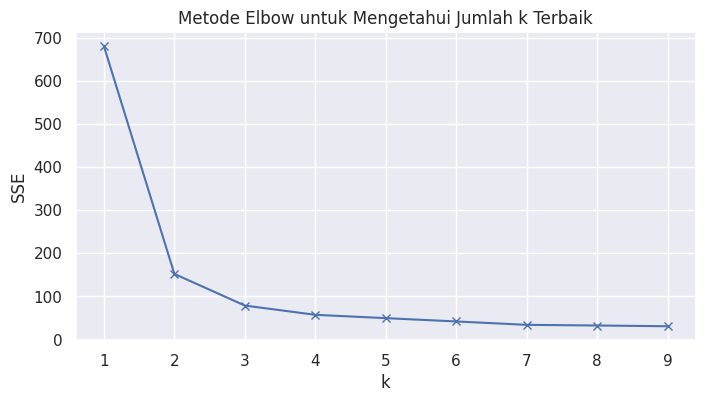

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

- sse = []: Variabel sse akan digunakan untuk menyimpan nilai SSE (Sum of Squared Errors) untuk setiap nilai k (jumlah kluster) yang diuji.
- K = range(1,10): K adalah rentang nilai k yang akan diuji, dari 1 hingga 9 (karena range(1, 10) tidak termasuk 10).
- Looping untuk setiap k dalam rentang K.
  - KMeans(n_clusters=k): Membuat model KMeans dengan jumlah kluster k yang berbeda pada setiap iterasi.
  - kmeanModel.fit(X): Model dilatih menggunakan data fitur X.
  - sse.append(kmeanModel.inertia_): Nilai SSE dari model yang telah dilatih ditambahkan ke dalam list sse.
- Membuat grafik Elbow untuk menampilkan hubungan antara jumlah kluster k dan nilai SSE.
  - plt.plot(K, sse, "bx-"): Membuat plot dengan sumbu-x sebagai k dan sumbu-y sebagai nilai SSE, dengan simbol titik biru ("bx-").
  - plt.xlabel("k"): Memberi label pada sumbu-x dengan "k" (jumlah kluster).
  - plt.ylabel("SSE"): Memberi label pada sumbu-y dengan "SSE".
  - plt.title(): Memberi judul plot, yaitu "Metode Elbow untuk Mengetahui Jumlah k Terbaik".
  - plt.show(): Menampilkan grafik.

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94084142614601
k=4; SSE=57.4732732654949
k=5; SSE=49.743776390094766
k=6; SSE=42.0686256330626
k=7; SSE=34.190687924796634
k=8; SSE=32.66203099838968
k=9; SSE=30.928388888888882


- enumerate(sse, start=1): Fungsi enumerate digunakan untuk mengiterasi list nilai SSE (yang telah dihitung sebelumnya), sambil memberi indeks (mulai dari 1 karena start=1).
  - idx: Akan menyimpan nilai k (jumlah kluster), dimulai dari 1.
  - sse_val: Menyimpan nilai SSE yang sesuai untuk setiap k.
- print(f'k={idx}; SSE={sse_val}'): Mencetak hasil jumlah kluster k dan nilai SSE yang bersangkutan, dalam format "k=<k>; SSE=<nilai SSE>".

# PRAKTIKUM 2

## Konsep KMeans untuk klastering data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

- import seaborn as sns; sns.set(): Seaborn adalah pustaka yang dibangun di atas Matplotlib untuk membuat visualisasi statistik yang lebih informatif dan menarik secara estetika.
- sns.set() digunakan untuk mengatur tema visualisasi yang disediakan oleh Seaborn, sehingga grafik menjadi lebih rapi dan enak dilihat dengan pengaturan default yang lebih bagus.
- import numpy as np: NumPy adalah pustaka Python yang digunakan untuk komputasi numerik, terutama yang berkaitan dengan array multidimensi.
- import matplotlib.pyplot as plt: Matplotlib adalah pustaka visualisasi data yang sangat populer di Python. pyplot menyediakan antarmuka sederhana untuk membuat berbagai jenis grafik dan visualisasi, seperti scatter plot, line plot, bar plot, dll.

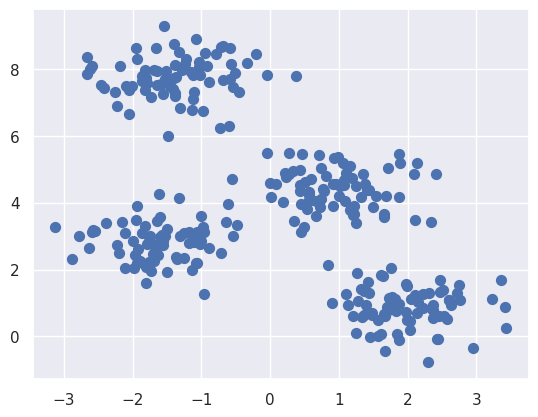

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

- from sklearn.datasets import make_blobs: make_blobs adalah fungsi dari scikit-learn yang digunakan untuk menghasilkan dataset simulasi (berupa titik-titik data) yang tersebar dalam beberapa kluster.
- X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
  - n_samples=300: Menghasilkan 300 sampel data (titik).
  - centers=4: Data akan dihasilkan dalam 4 pusat kluster yang berbeda.
  - cluster_std=0.60: Menentukan standar deviasi dari kluster, yang mengontrol seberapa tersebar titik-titik dalam setiap kluster.
  - random_state=0: Menentukan seed untuk pengacakan agar hasil tetap konsisten setiap kali kode dijalankan.
  - X: Merupakan fitur (koordinat titik data) dalam bentuk array 2D (setiap titik memiliki dua nilai untuk x dan y).
  - y_true: Merupakan label asli dari kluster setiap titik (hanya digunakan untuk keperluan evaluasi atau visualisasi).
- plt.scatter(X[:, 0], X[:, 1], s=50);
  - plt.scatter: Membuat scatter plot menggunakan data X.
    - X[:, 0]: Mengambil koordinat x (kolom pertama dari X).
    - X[:, 1]: Mengambil koordinat y (kolom kedua dari X).
  - s=50: Ukuran setiap titik diatur menjadi 50.
  - Hasil plot akan menampilkan data titik-titik yang dikelompokkan ke dalam 4 kluster yang terpisah

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

- from sklearn.cluster import KMeans: KMeans adalah algoritma clustering yang populer dalam pembelajaran mesin.
- kmeans = KMeans(n_clusters=4): n_clusters=4: Mengatur jumlah kluster yang diinginkan menjadi 4. Algoritma KMeans akan mencoba mengelompokkan data ke dalam 4 kluster berbeda.
- kmeans.fit(X): kmeans.fit(X): Melatih model KMeans menggunakan data X (data fitur dari make_blobs yang berisi koordinat titik-titik data). Model akan mencoba menemukan pusat-pusat kluster dan mengelompokkan data sesuai dengan kluster yang diidentifikasi.
- y_kmeans = kmeans.predict(X)
  - kmeans.predict(X): Setelah model KMeans dilatih, ini digunakan untuk memprediksi kluster mana setiap titik data dalam X berada.
  - y_kmeans adalah array yang menyimpan label kluster untuk setiap titik data di X. Nilai di y_kmeans akan berupa angka 0, 1, 2, atau 3, yang menunjukkan kluster mana setiap titik masuk (karena ada 4 kluster).

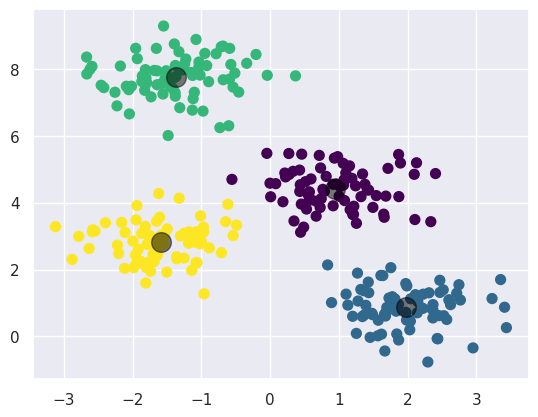

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

- plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
  - X[:, 0] dan X[:, 1]: Mengambil dua kolom pertama dari X (koordinat x dan y) untuk plot scatter.
  - c=y_kmeans: Menggunakan label kluster dari y_kmeans sebagai nilai warna untuk setiap titik. Setiap titik akan diberi warna berbeda berdasarkan kluster yang diprediksi oleh KMeans.
  - s=50: Mengatur ukuran titik scatter menjadi 50.
  - cmap='viridis': Menggunakan skema warna viridis untuk memberikan warna berbeda pada setiap kluster. Viridis adalah colormap populer yang memiliki gradasi warna dari kuning ke hijau dan ungu.
- centers = kmeans.cluster_centers_; plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
  - kmeans.cluster_centers_: Mengambil koordinat dari pusat kluster yang ditemukan oleh algoritma KMeans. Ini adalah titik yang mewakili "pusat" dari setiap kluster.
  - centers[:, 0] dan centers[:, 1]: Mengambil koordinat x dan y dari pusat-pusat kluster untuk plot.
  - c='black': Mengatur warna titik pusat kluster menjadi hitam, sehingga mudah dibedakan dari titik-titik kluster lainnya.
  - s=200: Mengatur ukuran titik pusat kluster lebih besar (200) agar lebih terlihat.
  - alpha=0.5: Mengatur tingkat transparansi titik-titik pusat kluster, di mana 0.5 berarti titik agak transparan.

## Algoritma Expectation-Maximization

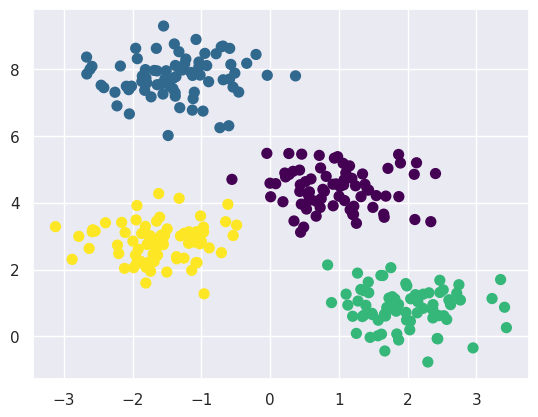

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- rng = np.random.RandomState(rseed): Membuat generator angka acak berdasarkan rseed (seed untuk memastikan random tetap konsisten).
- i = rng.permutation(X.shape[0])[:n_clusters]: Mengacak urutan data dan memilih sejumlah titik sebagai pusat kluster awal.
- centers = X[i]: Menetapkan data yang dipilih sebagai pusat awal dari masing-masing kluster.

- labels = pairwise_distances_argmin(X, centers): Menghitung jarak dari setiap titik data ke semua pusat kluster, lalu menetapkan kluster terdekat.

- new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)]): Menghitung pusat kluster baru sebagai rata-rata dari semua titik yang ditetapkan ke kluster tersebut.

- if np.all(centers == new_centers): Jika semua pusat kluster tetap sama dengan pusat kluster sebelumnya, maka algoritma berhenti.

- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat scatter plot dari data X. Setiap titik diberi warna berdasarkan kluster yang sudah ditemukan oleh algoritma (dengan labels). cmap='viridis' digunakan untuk memberikan warna yang berbeda bagi tiap kluster.

### Perubahan Random

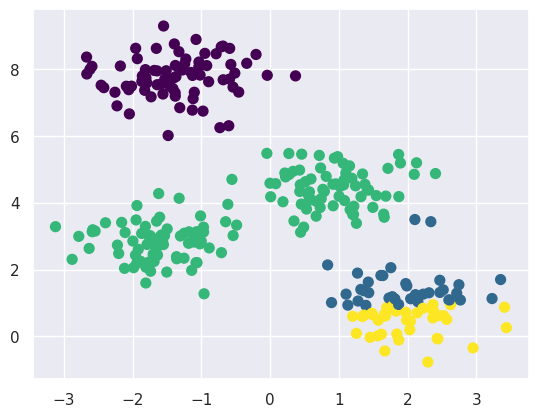

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- centers, labels = find_clusters(X, 4, rseed=0): Memanggil fungsi find_clusters dengan parameter:
  - X: Data yang akan dikelompokkan.
  - 4: Jumlah kluster yang ingin dibentuk.
  - rseed=0: Seed acak untuk memastikan hasil yang dapat direproduksi (agar kluster awal selalu sama jika kode dijalankan ulang).
  - centers: Menyimpan pusat dari keempat kluster yang ditemukan.
  - labels: Menyimpan label kluster untuk setiap titik data, yang menunjukkan kluster mana yang dimasuki oleh tiap titik.
- Memvisualisasikan hasil klusterisasi: plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat scatter plot dari data X

### Optimalisasi Jumlah Klaster

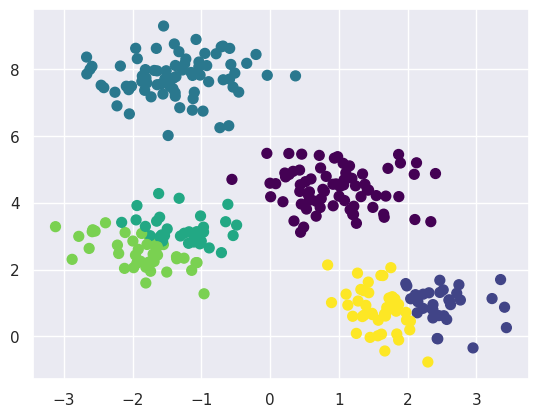

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- KMeans(6, random_state=0): Menginisialisasi algoritma KMeans dengan jumlah kluster yang diinginkan, yaitu 6 kluster. Parameter random_state=0 digunakan agar hasil inisialisasi acak bisa diulang dan konsisten setiap kali kode dijalankan.
- fit_predict(X):
  - fit: Melakukan proses klusterisasi pada data X.
  - predict: Menghasilkan label kluster untuk setiap titik data dalam X. Nilai labels menyimpan label (0 hingga 5) untuk setiap titik, menunjukkan kluster mana yang dimasuki oleh titik tersebut.
- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat plot scatter berdasarkan fitur pertama dan kedua dari data X

### Batas Klaster yang Tidak Selalu Linear

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

- make_moons(200, noise=.05, random_state=0): make_moons: Sebuah fungsi dari scikit-learn yang digunakan untuk membuat dataset dua dimensi dengan dua kelompok data berbentuk setengah lingkaran (seperti bulan sabit).
  - 200: Jumlah sampel (titik data) yang dihasilkan. Dalam hal ini, dataset akan terdiri dari 200 titik.
  - noise=.05: Tingkat noise (gangguan) yang ditambahkan ke data. Noise kecil ini bertujuan untuk membuat data tidak terlalu ideal, sehingga model yang dilatih lebih realistis.
  - random_state=0: Seed untuk pengacakan, yang memastikan bahwa hasil data yang dihasilkan selalu sama setiap kali kode ini dijalankan.
- Variabel Output: X dan y:
  - X: Berisi koordinat dari setiap titik data. Ini adalah fitur dari dataset, dan berbentuk array dengan dua kolom (karena data ini dua dimensi).
  - y: Berisi label atau kategori dari setiap titik data, biasanya berupa 0 atau 1 untuk menunjukkan dua kelompok yang berbeda (moons kiri dan kanan).

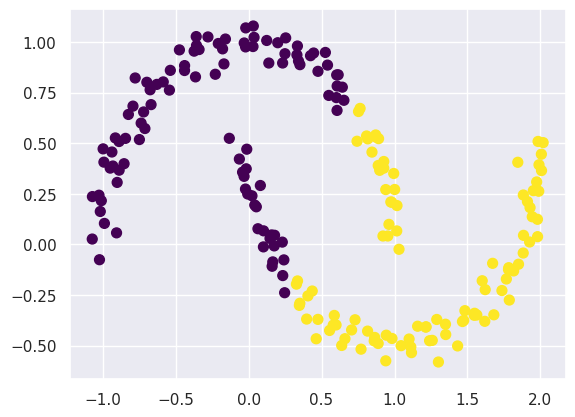

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

- labels = KMeans(2, random_state=0).fit_predict(X)
  - KMeans(2, random_state=0): Menginisialisasi algoritma KMeans untuk membagi data menjadi 2 kluster (karena kita tahu dataset moons memiliki dua kelompok atau bulan sabit).
  - fit_predict(X):
    - fit: KMeans akan melakukan proses klusterisasi pada data X.
    - predict: Setelah proses klusterisasi, algoritma akan menghasilkan label untuk setiap titik dalam data X, yang menunjukkan kluster mana titik tersebut masuk (0 atau 1 dalam hal ini).
  - labels: Variabel ini akan menyimpan label hasil klusterisasi dari KMeans, di mana setiap titik data diberi label 0 atau 1, sesuai dengan kluster yang didapat.
- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat plot scatter untuk memvisualisasikan hasil klusterisasi

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


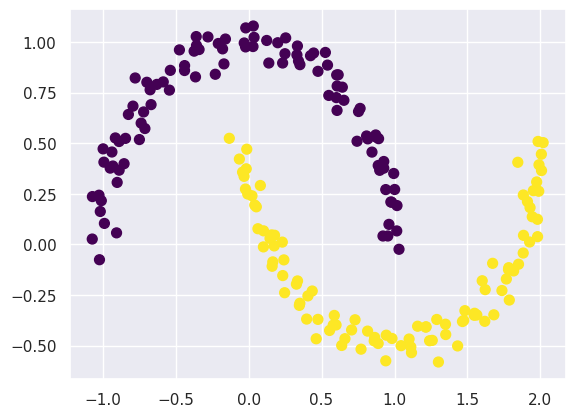

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

- from sklearn.cluster import SpectralClustering; model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
  - SpectralClustering(n_clusters=2): Menginisialisasi model Spectral Clustering untuk membagi data menjadi 2 kluster. Pada dataset moons, kita memang tahu ada 2 kelompok.
  - affinity='nearest_neighbors': Menentukan cara untuk mengukur hubungan antara titik-titik data. Nearest_neighbors berarti algoritma akan mempertimbangkan hubungan antara titik yang paling dekat.
  - assign_labels='kmeans': Setelah menemukan representasi spektral data, k-means digunakan untuk mengelompokkan data ke dalam kluster.
- labels = model.fit_predict(X)
  - fit_predict(X): Algoritma Spectral Clustering akan menjalankan proses klusterisasi pada data X dan mengembalikan label untuk setiap titik data.
  - labels: Variabel ini menyimpan label kluster hasil klusterisasi, yaitu 0 atau 1 untuk dua kluster yang terbentuk.
- plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis'): Membuat scatter plot untuk memvisualisasikan hasil klusterisasi

### Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

- load_digits(): Fungsi ini memuat dataset digits, yang berisi gambar angka (0-9) dalam bentuk digital. Setiap gambar adalah representasi dari angka dengan dimensi 8x8 piksel.
- digits.data.shape akan mengembalikan bentuk data dari dataset digits, yaitu (1797, 64), yang berarti ada 1797 gambar dan setiap gambar direpresentasikan oleh 64 fitur (piksel).

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

- KMeans(n_clusters=10, random_state=0): Menginisialisasi objek KMeans dengan parameter:
  - n_clusters=10: Menentukan bahwa algoritma akan mencari 10 kluster. Ini sesuai dengan jumlah kelas dalam dataset digits (angka 0-9).
  - random_state=0: Mengatur seed acak untuk memastikan hasil yang konsisten dan dapat direproduksi.
- fit_predict(digits.data): Fungsi ini melakukan dua langkah sekaligus:
  - fit: Melatih model K-Means dengan data digits.data.
  - predict: Menggunakan model yang telah dilatih untuk memprediksi kluster untuk setiap sampel dalam digits.data.
- clusters: Variabel ini menyimpan label kluster yang ditetapkan untuk setiap gambar. Dengan 1797 sampel, variabel ini akan berisi 1797 label, di mana setiap label menunjukkan kluster mana gambar tersebut termasuk.

- kmeans.cluster_centers_.shape akan mengembalikan bentuk data dari pusat kluster K-Means, yang seharusnya memberikan output (10, 64), artinya ada 10 pusat kluster (satu untuk setiap digit) dan setiap pusat kluster direpresentasikan oleh 64 fitur (piksel).

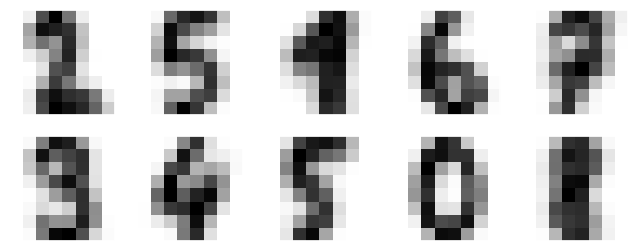

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

- plt.subplots(2, 5, figsize=(8, 3)): Fungsi ini membuat sebuah figure dengan subplots dalam bentuk grid.
  - 2, 5: Menentukan jumlah baris dan kolom dalam grid subplot (2 baris dan 5 kolom, total 10 subplot).
  - figsize=(8, 3): Mengatur ukuran figure menjadi 8 inci lebar dan 3 inci tinggi.
- kmeans.cluster_centers_: Mengambil pusat kluster yang dihitung oleh K-Means.
- .reshape(10, 8, 8): Mengubah bentuk pusat kluster dari (10, 64) menjadi (10, 8, 8). Ini berarti:
  - 10: Jumlah kluster (satu untuk setiap digit).
  - 8, 8: Dimensi citra untuk setiap pusat kluster (8x8 piksel).
- for axi, center in zip(ax.flat, centers):: Melakukan iterasi melalui setiap subplot (dalam format datar) dan setiap pusat kluster.
  - ax.flat: Mengakses semua subplot dalam satu dimensi untuk memudahkan iterasi.
  - center: Merujuk pada pusat kluster yang sedang diproses.
- axi.set(xticks=[], yticks=[]): Menghapus label pada sumbu x dan y untuk setiap subplot agar tampilan lebih bersih.
- axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary): Menampilkan pusat kluster sebagai gambar:
  - imshow(center, ...): Menampilkan citra dari pusat kluster.
  - interpolation='nearest': Menentukan cara interpolasi citra, di sini menggunakan metode "nearest" untuk tampilan yang jelas.
  - cmap=plt.cm.binary: Menggunakan colormap biner untuk menampilkan citra dalam hitam-putih (0=putih, 1=hitam).

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

- np.zeros_like(clusters): Membuat array labels yang memiliki bentuk yang sama dengan clusters, diisi dengan nol. Array ini akan digunakan untuk menyimpan label yang sesuai untuk setiap kluster.
- for i in range(10):: Melakukan iterasi dari 0 hingga 9, di mana setiap iterasi mewakili satu kluster (karena kita menggunakan K-Means dengan 10 kluster untuk digit 0-9).
- mask = (clusters == i): Membuat mask (sebuah array boolean) yang menunjukkan posisi di mana elemen di array clusters sama dengan i.
- mode(digits.target[mask])[0]: Menggunakan fungsi mode dari scipy.stats untuk menghitung nilai modus (nilai yang paling sering muncul) dari digits.target di mana kondisi mask benar. Ini akan memberikan label yang paling umum untuk kluster tersebut.
  - digits.target: Array yang berisi label sebenarnya (target) untuk dataset digit (0-9).
- labels[mask] = ...: Menyimpan label yang ditemukan untuk semua posisi yang sesuai dengan kluster ke-i di array labels.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

- from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung akurasi model klasifikasi dengan membandingkan label sebenarnya dan prediksi model.
- accuracy_score(...): Memanggil fungsi accuracy_score dengan dua argumen:
  - digits.target: Ini adalah array yang berisi label sebenarnya dari dataset digit (0-9).
  - labels: Ini adalah array yang berisi label yang dihasilkan oleh algoritma  K-Means setelah melakukan pengelompokan berdasarkan modus dari label asli untuk setiap kluster.

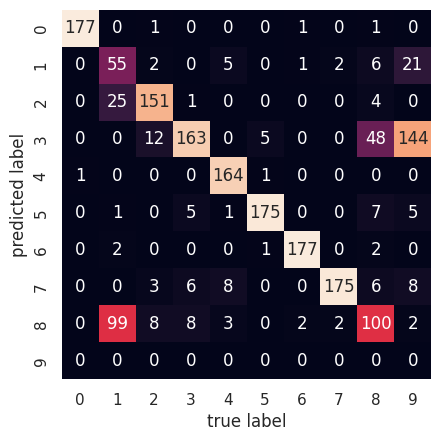

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

- from sklearn.metrics import confusion_matrix: Mengimpor fungsi confusion_matrix dari modul sklearn.metrics. Fungsi ini digunakan untuk menghitung matriks kebingungan, yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
- confusion_matrix(...): Memanggil fungsi confusion_matrix dengan dua argumen:
  - digits.target: Array yang berisi label sebenarnya dari dataset digit (0-9).
  - labels: Array yang berisi label yang dihasilkan oleh algoritma K-Means setelah melakukan pengelompokan.
- sns.heatmap(...): Menggunakan fungsi heatmap dari pustaka Seaborn untuk menampilkan matriks kebingungan dalam bentuk heatmap. Parameter yang digunakan adalah:
  - mat.T: Menggunakan transpos matriks kebingungan agar sumbu X dan Y ditampilkan dengan benar.
  - square=True: Menetapkan setiap sel dalam heatmap untuk berbentuk persegi.
  - annot=True: Menampilkan nilai di setiap sel.
  - fmt='d': Format nilai yang ditampilkan sebagai integer (desimal).
  - cbar=False: Tidak menampilkan color bar di samping heatmap.
  - xticklabels=digits.target_names: Menetapkan label sumbu X berdasarkan nama target digit.
  - yticklabels=digits.target_names: Menetapkan label sumbu Y berdasarkan nama target digit.
- plt.xlabel(...): Menetapkan label untuk sumbu X sebagai "true label" (label sebenarnya).
- plt.ylabel(...): Menetapkan label untuk sumbu Y sebagai "predicted label" (label yang diprediksi).

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9415692821368948

- from sklearn.manifold import TSNE: Mengimpor kelas TSNE dari modul sklearn.manifold. t-SNE adalah teknik untuk mereduksi dimensi data, sering digunakan untuk visualisasi data dalam dua atau tiga dimensi.
- tsne = TSNE(...): Membuat objek t-SNE dengan parameter:
  - n_components=2: Menetapkan jumlah dimensi hasil reduksi menjadi 2.
  - init='random': Memulai proses t-SNE dengan nilai acak.
  - random_state=0: Menetapkan seed untuk pengacakan sehingga hasilnya dapat direproduksi.
- digits_proj = tsne.fit_transform(digits.data): Menerapkan t-SNE pada data digit. Fungsi fit_transform akan melakukan transformasi data ke dalam dua dimensi, dan hasilnya disimpan dalam digits_proj.
- kmeans = KMeans(...): Membuat objek KMeans dengan parameter:
  - n_clusters=10: Menetapkan jumlah kluster yang diinginkan menjadi 10 (untuk digit 0-9).
  - random_state=0: Menetapkan seed untuk pengacakan.
- clusters = kmeans.fit_predict(digits_proj): Menerapkan K-Means pada data yang sudah direduksi dimensinya dengan t-SNE. Fungsi fit_predict akan melatih model dan mengembalikan label kluster untuk setiap data point.
- labels = np.zeros_like(clusters): Membuat array baru dengan ukuran yang sama dengan clusters, diisi dengan nol. Array ini akan digunakan untuk menyimpan label yang dipermutasi berdasarkan hasil kluster.
- for i in range(10):: Melakukan iterasi untuk setiap kluster (0-9).
  - mask = (clusters == i): Membuat mask boolean untuk mengidentifikasi elemen-elemen dalam clusters yang merupakan bagian dari kluster ke-i.
  - labels[mask] = mode(digits.target[mask])[0]: Menghitung mode (nilai yang paling sering muncul) dari label target yang sesuai dengan elemen dalam kluster ke-i dan menyimpannya dalam array labels.
- accuracy_score(...): Menghitung akurasi antara label target asli digits.target dan label yang dipermutasi labels. Fungsi ini akan mengembalikan nilai akurasi yang menunjukkan seberapa baik model K-Means mengelompokkan data digit.

### Studi Kasus 2: Kompresi Citra

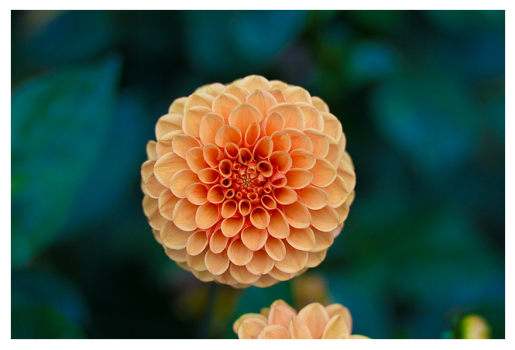

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

- from sklearn.datasets import load_sample_image: Mengimpor fungsi load_sample_image dari modul sklearn.datasets. Fungsi ini digunakan untuk memuat gambar contoh yang disediakan oleh scikit-learn, seperti gambar bunga dalam kode ini.
- ax = plt.axes(xticks=[], yticks=[]): Membuat objek axes (sumbu) baru tanpa tanda skala pada sumbu x dan y. Parameter xticks=[] dan yticks=[] menghapus label tick dari kedua sumbu, sehingga hanya gambar yang akan ditampilkan tanpa gangguan dari skala.

In [ ]:
flower.shape

(427, 640, 3)

- Hasil dari flower.shape biasanya akan menghasilkan tuple yang menunjukkan dimensi gambar

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

- data = flower / 255.0: Di sini, Anda melakukan normalisasi pixel dari gambar yang dimuat sebelumnya. Setiap nilai pixel dalam gambar berkisar antara 0 hingga 255. Dengan membagi setiap nilai pixel dengan 255, kita mengubah rentang pixel menjadi antara 0 dan 1.
- data = data.reshape(427 * 640, 3): Pada baris ini, kita mengubah bentuk array data. Gambar awalnya memiliki dimensi (427, 640, 3), yang berarti gambar tersebut memiliki tinggi 427 piksel, lebar 640 piksel, dan 3 saluran warna (RGB).
- data.shape: Ini akan memberikan informasi tentang dimensi baru dari array data setelah reshape.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

- def plot_pixels(data, title, colors=None, N=10000):: Ini adalah definisi fungsi dengan nama plot_pixels. Fungsi ini memiliki beberapa parameter:
  - data: Array yang berisi informasi warna untuk setiap piksel (dalam format RGB).
  - title: Judul untuk grafik yang akan ditampilkan.
  - colors: Parameter opsional yang berisi warna untuk setiap titik. Jika tidak diberikan, akan menggunakan nilai dari data.
  - N: Jumlah titik yang akan dipilih secara acak untuk ditampilkan (default adalah 10.000).
- if colors is None:: Mengecek apakah parameter colors diberikan. Jika tidak, maka colors akan diatur sama dengan data.
- rng = np.random.RandomState(0): Membuat generator bilangan acak dengan seed tetap (0). Ini berguna untuk memastikan bahwa pemilihan titik acak dapat direproduksi di masa mendatang.
- i = rng.permutation(data.shape[0])[:N]: Menghasilkan urutan angka acak dari 0 hingga jumlah piksel dalam data, dan memilih N angka acak pertama dari urutan tersebut.
- colors = colors[i]: Mengambil warna untuk titik yang dipilih berdasarkan indeks i.
- R, G, B = data[i].T: Mengambil nilai RGB dari titik yang dipilih dan mentransposisikan array sehingga R, G, dan B menjadi array satu dimensi terpisah.
- fig, ax = plt.subplots(1, 2, figsize=(16, 6)): Membuat sebuah figure dan dua subplot (satu baris dan dua kolom) dengan ukuran 16x6 inci.
- ax[0].scatter(R, G, color=colors, marker='.'): Membuat scatter plot pertama dengan sumbu X sebagai nilai Red dan sumbu Y sebagai nilai Green, menggunakan warna yang ditentukan.
- ax[0].set(...): Mengatur label sumbu X dan Y, serta rentang sumbu X dan Y (0 hingga 1).
- fig.suptitle(title, size=20): Mengatur judul untuk keseluruhan figure dengan ukuran font 20.

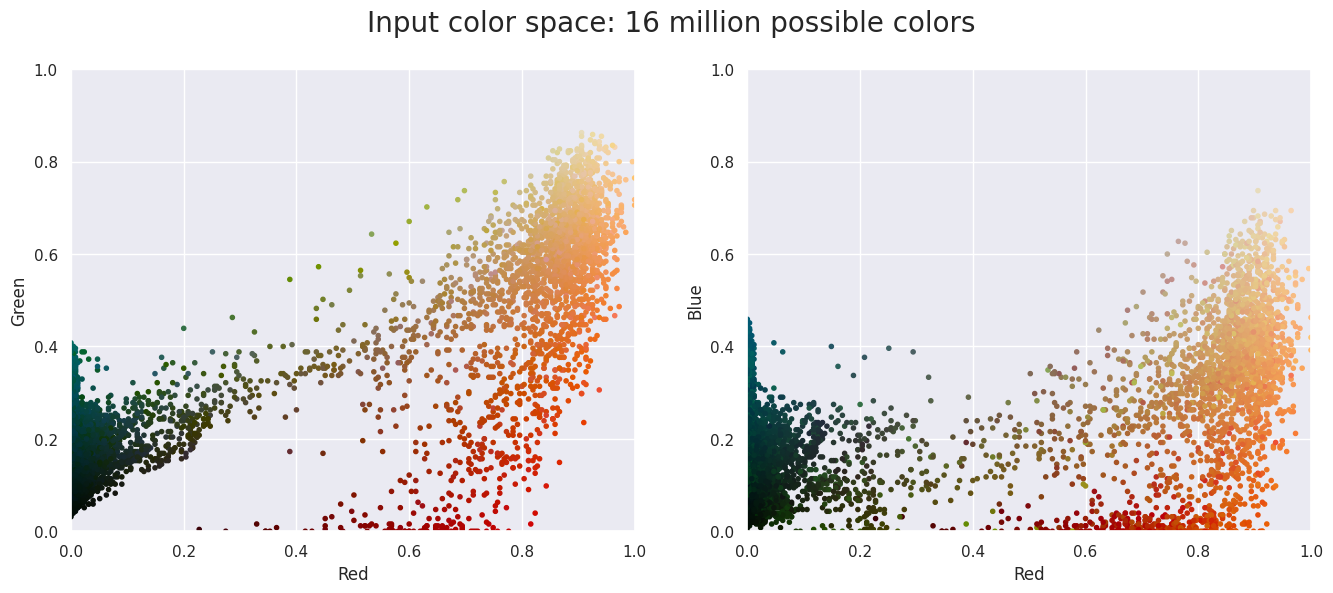

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

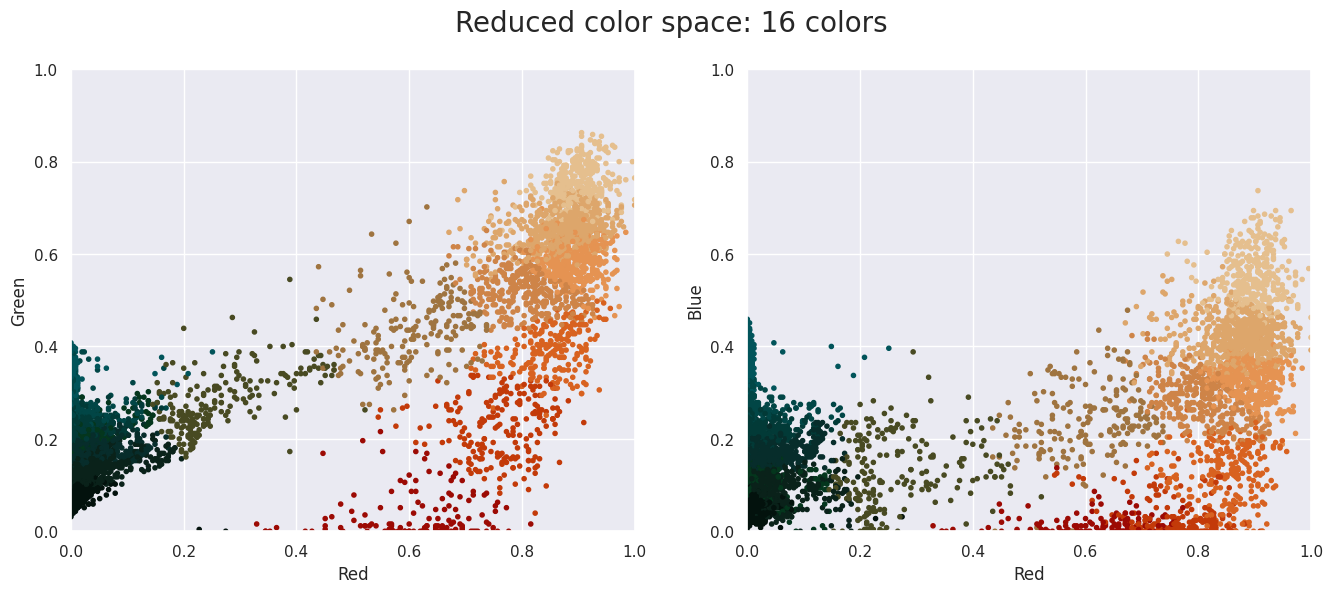

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

- import warnings; warnings.simplefilter('ignore') : Kode ini digunakan untuk mengimpor modul warnings dan mengatur filter agar mengabaikan peringatan.
- from sklearn.cluster import MiniBatchKMeans : Kode ini mengimpor kelas MiniBatchKMeans dari sklearn.cluster. MiniBatchKMeans adalah versi efisien dari KMeans yang dapat menangani dataset besar dengan lebih baik menggunakan batch kecil.
- kmeans = MiniBatchKMeans(16) : Di sini, objek kmeans dibuat dengan jumlah cluster yang ditetapkan sebanyak 16. Ini berarti algoritma akan mengelompokkan warna dalam gambar ke dalam 16 warna yang berbeda.
- kmeans.fit(data) : Kode ini melatih model KMeans menggunakan data warna dari gambar. Model akan mencoba menemukan pusat cluster warna.
- new_colors = kmeans.cluster_centers_[kmeans.predict(data)] : Pada langkah ini, model digunakan untuk memprediksi cluster mana setiap piksel dalam gambar harus termasuk. Kemudian, pusat cluster (warna) diambil untuk setiap piksel berdasarkan prediksi tersebut.
- plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors") : Fungsi plot_pixels dipanggil untuk memvisualisasikan warna baru yang telah direduksi. Di sini, colors=new_colors memberikan daftar warna baru untuk digunakan dalam plot, dan title memberikan judul yang sesuai.

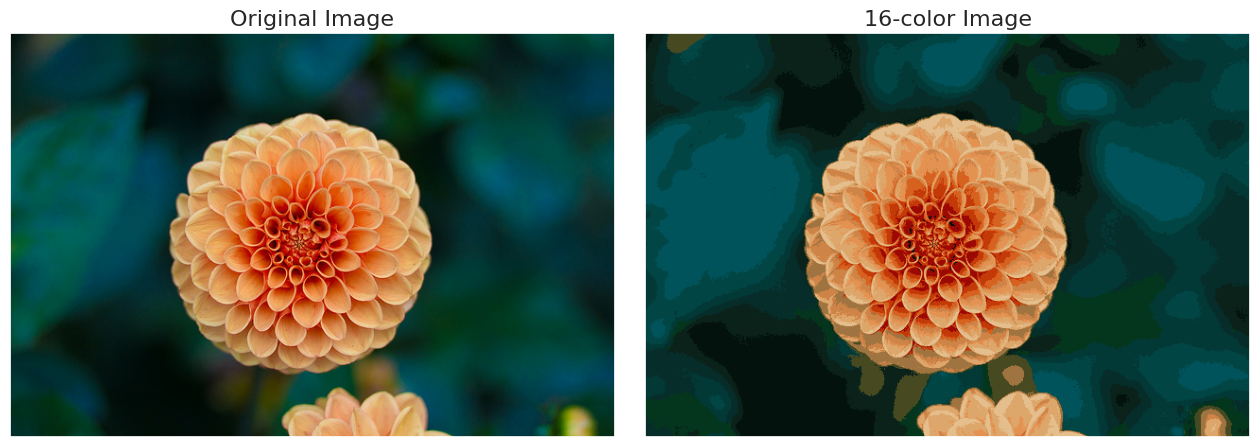

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

- flower_recolored = new_colors.reshape(flower.shape) : Kode ini mengambil array new_colors, yang berisi warna baru dari gambar yang telah direduksi, dan mengubah bentuknya untuk mencocokkan dimensi gambar asli flower.
- fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[])) : Di sini, dua subplot (sisi) dibuat dalam satu baris. figsize=(16, 6) menentukan ukuran gambar. subplot_kw=dict(xticks=[], yticks=[]) digunakan untuk menghilangkan tick marks (tanda skala) pada sumbu x dan y, sehingga tampilan gambar lebih bersih.
- fig.subplots_adjust(wspace=0.05) : Kode ini mengatur jarak antara subplot agar lebih rapat, dengan wspace menentukan ruang horizontal antara kolom subplot.

# PRAKTIKUM 3

## Self-optimizing Map (SOM)

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=b2a4e2ca72dbfa16caf504656f34a2042331d71688519113bf973c0f1fcf98d1
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


- Perintah pip install minisom digunakan untuk menginstal library MiniSom, yang merupakan implementasi dari Self-Organizing Maps (SOM) dalam Python.

In [ ]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

- from minisom import MiniSom: Mengimpor kelas MiniSom dari library minisom, yang digunakan untuk membuat dan melatih Self-Organizing Maps (SOM).
- import numpy as np: Mengimpor library NumPy yang digunakan untuk operasi matematis dan manipulasi array.
- import matplotlib.pyplot as plt: Mengimpor pyplot dari library matplotlib untuk visualisasi data.
- from sklearn import datasets: Mengimpor modul datasets dari scikit-learn, yang menyediakan akses ke beberapa dataset sampel untuk pengujian dan demonstrasi.

In [ ]:
# Load dataset
iris = datasets.load_iris()
data = iris.data

- iris = datasets.load_iris(): Kode ini menggunakan fungsi load_iris() dari modul datasets pada scikit-learn untuk memuat dataset Iris.
- data = iris.data: Kode ini menyimpan fitur dari dataset Iris ke dalam variabel data.

In [ ]:
# Normalisasi data
data = data / data.max(axis=0)

- data.max(axis=0): Kode ini menghitung nilai maksimum untuk setiap kolom (fitur) dalam array data.
  - axis=0 berarti fungsi max akan beroperasi di sepanjang baris, sehingga mengembalikan array satu dimensi yang berisi nilai maksimum dari setiap kolom.

In [ ]:
# Inisialisasi SOM
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5)

- map_size = (10, 10): Kode ini mendefinisikan ukuran peta SOM. Di sini, peta akan memiliki ukuran 10 baris dan 10 kolom.
- MiniSom(map_size[0], map_size[1], data.shape[1], sigma=0.5, learning_rate=0.5):
  - MiniSom: Ini adalah kelas dari pustaka minisom yang digunakan untuk membuat dan melatih SOM.
  - map_size[0] dan map_size[1]: Ini memberikan jumlah baris dan kolom untuk peta SOM (10 dan 10).
  - data.shape[1]: Ini memberikan jumlah fitur dari data.
  - sigma=0.5: Ini adalah parameter yang mengontrol ukuran neighborhood (tetangga) pada saat pembelajaran.
  - learning_rate=0.5: Ini adalah laju pembelajaran SOM. Laju pembelajaran mengatur seberapa cepat model akan memperbarui bobot neuron saat memproses data.

In [ ]:
# Inisialisasi bobot secara acak
som.random_weights_init(data)

- som.random_weights_init(data): Metode ini digunakan untuk menginisialisasi bobot dari neuron-neuron dalam peta SOM secara acak.

In [ ]:
# Pelatihan SOM
num_epochs = 100
som.train_random(data, num_epochs)

- num_epochs = 100: Variabel ini menyimpan jumlah epoch atau iterasi pelatihan yang akan dilakukan. Dalam hal ini, SOM akan dilatih selama 100 epoch.
- som.train_random(data, num_epochs): Metode ini digunakan untuk melatih SOM menggunakan metode pelatihan acak.
  - num_epochs: Ini adalah jumlah iterasi di mana pelatihan akan dilakukan. Setiap epoch, neuron-neuron dalam SOM akan diperbarui berdasarkan input data yang diberikan.

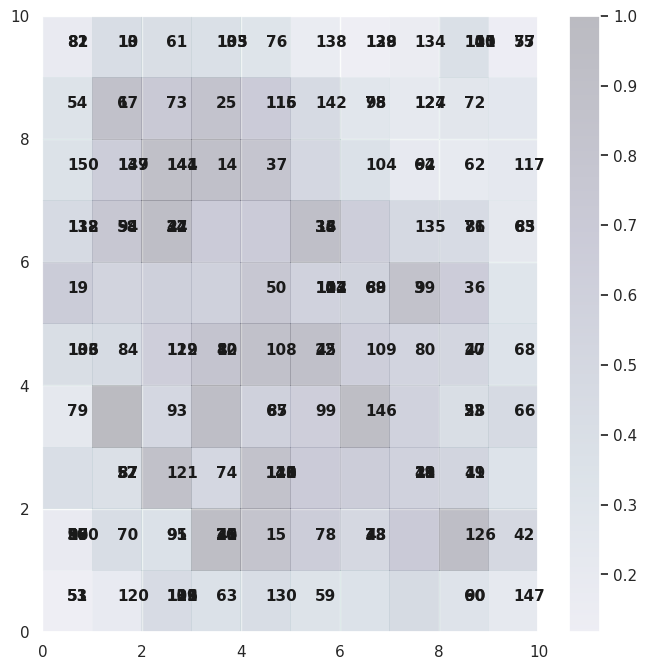

In [ ]:
# Visualisasi hasil SOM
plt.figure(figsize=(8, 8))
for i, x in enumerate(data):
    w = som.winner(x)  # Pemenang untuk sampel x
    plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

plt.show()

- plt.figure(figsize=(8, 8)): Membuat sebuah figure baru untuk visualisasi dengan ukuran 8x8 inci.
- for i, x in enumerate(data):: Melakukan iterasi melalui setiap data point di dataset. enumerate(data) memberikan index (i) dan nilai data (x) untuk setiap titik data.
- w = som.winner(x): Untuk setiap titik data x, kode ini mencari neuron pemenang (Best Matching Unit - BMU) yang paling sesuai dengan input x.
- plt.text(w[0]+.5, w[1]+.5, str(i+1), color='k', fontdict={'weight': 'bold', 'size': 11}): Menambahkan teks pada posisi pemenang neuron (BMU) yang menunjukkan nomor indeks dari data point tersebut.
- plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2):
  - Menggunakan pcolor untuk menggambar peta jarak dari SOM.
  - som.distance_map() menghasilkan matriks jarak antar neuron, yang menggambarkan seberapa jauh masing-masing neuron dari pemenang mereka.
  - .T melakukan transposisi pada peta jarak sehingga orientasinya cocok dengan grid.
  - cmap='bone_r' menentukan colormap yang digunakan untuk visualisasi, dan alpha=.2 mengatur transparansi peta warna.

# PRAKTIKUM 4

## Penerapan metode Self-Organizing Map (SOM) untuk segmentasi citra Lenna.

In [ ]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8c45354570472005c14c64b18b1babc04e3a8743f76f037df991dd7f291492db
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


- Perintah untuk menginstal pustaka MiniSom dalam Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

- import numpy as np: Ini mengimpor pustaka NumPy, yang merupakan pustaka Python untuk komputasi numerik.
- import matplotlib.pyplot as plt: Ini mengimpor modul pyplot dari pustaka Matplotlib, yang digunakan untuk membuat visualisasi data.
- from skimage import io: Ini mengimpor modul io dari pustaka skimage (scikit-image), yang merupakan pustaka untuk pemrosesan citra dalam Python. Modul io menyediakan fungsi untuk membaca dan menulis gambar dari dan ke file.

In [ ]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

- def initialize_weights(input_shape, output_shape):: Ini mendefinisikan sebuah fungsi bernama initialize_weights yang memiliki dua parameter: input_shape dan output_shape.
- return np.random.rand(output_shape[0], output_shape[1], input_shape[2]): Fungsi ini mengembalikan sebuah array yang diinisialisasi secara acak dengan nilai-nilai antara 0 dan 1.

In [ ]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

- def calculate_distance(input_vector, weights):: Ini mendefinisikan sebuah fungsi bernama calculate_distance yang memiliki dua parameter: input_vector dan weights.
  - input_vector adalah vektor masukan yang ingin dibandingkan dengan bobot peta SOM.
  - weights adalah array yang mewakili bobot dari node di peta SOM.
- return np.linalg.norm(input_vector - weights, axis=2): Fungsi ini mengembalikan nilai jarak antara input_vector dan setiap bobot di weights.

In [ ]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

- distances = calculate_distance(input_vector, weights): Fungsi ini memanggil fungsi calculate_distance yang sudah dibuat sebelumnya untuk menghitung jarak antara input_vector dan setiap bobot di weights.

In [ ]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

- distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2):
  - Fungsi ini menghitung jarak antara unit pemenang (BMU) dan setiap unit di peta SOM.
  - np.indices(weights.shape[:2]) membuat indeks untuk semua unit di peta SOM.
  - reshape(1, -1) memastikan bahwa winner menjadi vektor baris sehingga dapat dikurangkan dari semua indeks.
  - np.linalg.norm(..., axis=2) menghitung jarak Euclidean antara unit pemenang dan semua unit lain di peta.
- influence = np.exp(-distances / (2 * neighborhood_radius**2)): Ini menghitung pengaruh dari setiap unit di sekitar unit pemenang.
- weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights):
  - Ini adalah langkah pembaruan bobot untuk setiap unit di peta SOM.
  - input_vector - weights menghitung perbedaan antara input_vector dan bobot saat ini, menghasilkan arah perubahan yang diperlukan.
  - influence[:, :, np.newaxis] menambahkan dimensi baru untuk mengalikan pengaruh dengan perbedaan.
  - Hasilnya kemudian dikalikan dengan learning_rate untuk mengontrol seberapa banyak bobot diperbarui.

In [ ]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

- def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):: Ini mendefinisikan fungsi train_som yang digunakan untuk melatih Self-Organizing Map (SOM) berdasarkan citra yang diberikan.
Parameter:
  - image: Citra yang akan diproses, biasanya dalam format array 3D (tinggi, lebar, saluran warna).
  - num_epochs: Jumlah epoch (iterasi) untuk pelatihan SOM.
  - initial_learning_rate: Tingkat pembelajaran awal yang digunakan untuk memperbarui bobot.
  - initial_neighborhood_radius: Radius lingkungan awal yang digunakan untuk menentukan seberapa banyak unit tetangga memengaruhi pembaruan bobot.
- input_shape = image.shape: Mendapatkan bentuk (dimensi) dari citra yang diberikan. Ini akan memberikan informasi tentang tinggi, lebar, dan jumlah saluran warna dari citra.
- som_shape = (10, 10, input_shape[2]): Mendefinisikan bentuk dari SOM, yang dalam hal ini adalah peta 10x10 untuk jumlah saluran warna (misalnya RGB) dari citra.
- weights = initialize_weights(input_shape, som_shape): Menginisialisasi bobot SOM secara acak dengan memanggil fungsi initialize_weights yang telah dibuat sebelumnya.
- for epoch in range(num_epochs):: Memulai loop untuk setiap epoch dari pelatihan, selama jumlah epoch yang ditentukan.
- learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs): Menghitung nilai learning_rate yang menurun secara eksponensial seiring bertambahnya epoch. Hal ini memungkinkan pembaruan bobot menjadi lebih halus di akhir pelatihan.
- neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs): Menghitung nilai neighborhood_radius yang juga menurun secara eksponensial. Ini memungkinkan pengaruh unit tetangga menurun seiring waktu, fokus pada unit pemenang saat pelatihan berlangsung.
- for i in range(input_shape[0]): dan for j in range(input_shape[1]):: Dua loop bersarang untuk memproses setiap piksel (elemen) dalam citra, iterasi berdasarkan tinggi (i) dan lebar (j) citra.
- input_vector = image[i, j, :]: Mengambil vektor input untuk piksel tertentu, yaitu warna dari piksel tersebut dalam format RGB (atau saluran lainnya).
- winner = find_winner_unit_in_image(input_vector, weights): Menemukan unit pemenang (BMU) yang paling dekat dengan input_vector menggunakan fungsi find_winner_unit_in_image.
- update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius): Memperbarui bobot SOM berdasarkan piksel yang diambil, unit pemenang, serta parameter pembelajaran dan radius lingkungan.
return weights:
- Setelah pelatihan selesai, fungsi ini mengembalikan bobot akhir dari SOM.

In [ ]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
Lenna_path = "lenna.webp"
Lenna = io.imread(Lenna_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]

- / 255.0: Melakukan normalisasi intensitas piksel dengan membagi nilai piksel dengan 255.0. Ini mengubah rentang nilai piksel dari [0, 255] (nilai yang biasa ada dalam citra) menjadi [0, 1],

In [ ]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius)

- num_epochs = 100: Variabel ini menentukan jumlah epoch (iterasi) untuk pelatihan SOM. Dalam hal ini, SOM akan dilatih selama 100 epoch. Semakin banyak epoch, biasanya model dapat belajar lebih baik, tetapi juga dapat menyebabkan overfitting jika terlalu banyak.
- initial_learning_rate = 0.1: Menentukan tingkat pembelajaran awal yang digunakan untuk memperbarui bobot SOM.
- initial_neighborhood_radius = 5: Menentukan radius tetangga awal yang digunakan dalam pembaruan bobot. Radius ini menunjukkan seberapa besar area sekitar unit pemenang yang juga akan dipengaruhi oleh pembaruan bobot.
- trained_weights = train_som(Lenna, num_epochs, initial_learning_rate, initial_neighborhood_radius):
 - Memanggil fungsi train_som dengan argumen:
 - Lenna: citra yang telah dinormalisasi.
 - num_epochs: jumlah epoch yang telah ditentukan (100).
 - initial_learning_rate: tingkat pembelajaran awal (0.1).
 - initial_neighborhood_radius: radius tetangga awal (5).
- Hasil dari fungsi ini, yaitu bobot yang terlatih, disimpan dalam variabel trained_weights.

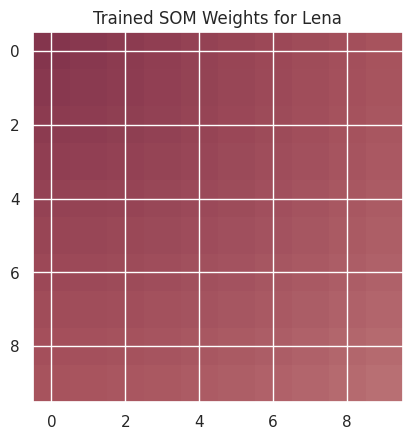

In [ ]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Lena')
plt.show()

- plt.imshow(trained_weights): Fungsi ini digunakan untuk menampilkan gambar bobot yang terlatih dari SOM.
- trained_weights adalah array 3D yang menyimpan bobot untuk setiap unit dalam SOM, di mana dimensi pertama dan kedua adalah ukuran peta (10x10 dalam hal ini) dan dimensi ketiga adalah saluran warna (RGB).

# TUGAS

## Buatlah sebuah model K-Means dengan ketentuan,



## 1. Gunakan data 'Mall_Customers.csv'

In [ ]:
import pandas as pd

# Load the Mall_Customers dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Show the first few rows of the dataset to explore its structure
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

Dataset 'Mall_Customers.csv' memiliki fitur-fitur sebagai berikut:
- CustomerID (ID pelanggan)
- Gender (Jenis kelamin)
- Age (Umur)
- Annual Income (Pendapatan Tahunan dalam ribuan dolar)
- Spending Score (1-100) (Skor Pengeluaran)


Untuk clustering dengan K-Means, fitur yang tepat digunakan adalah Annual Income (k$) dan Spending Score (1-100), karena keduanya memberikan informasi yang relevan untuk segmentasi pelanggan berdasarkan kebiasaan belanja dan pendapatan.

## 3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

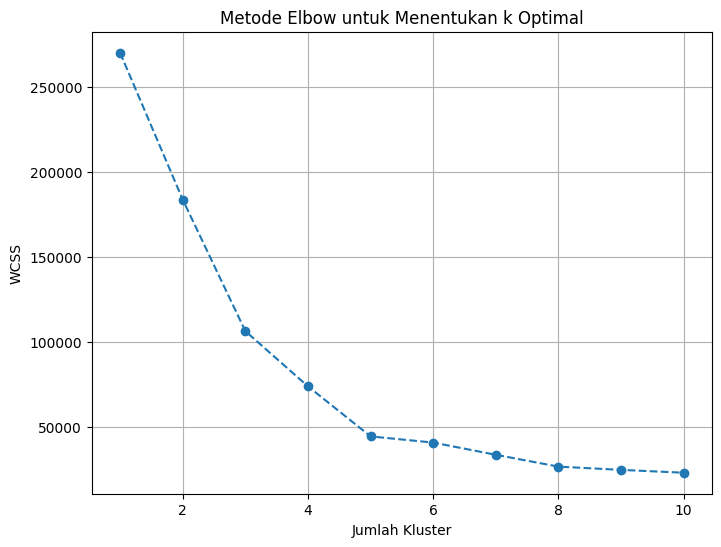

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Extracting the relevant features: Annual Income and Spending Score
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Elbow method to find the optimal number of clusters (k)
wcss = []  # Within-cluster sum of square

# Trying different k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Dari grafik Elbow di atas, terlihat bahwa penurunan WCSS mulai melambat setelah k=5, yang mengindikasikan bahwa 5 kluster adalah jumlah yang optimal untuk model K-Means.

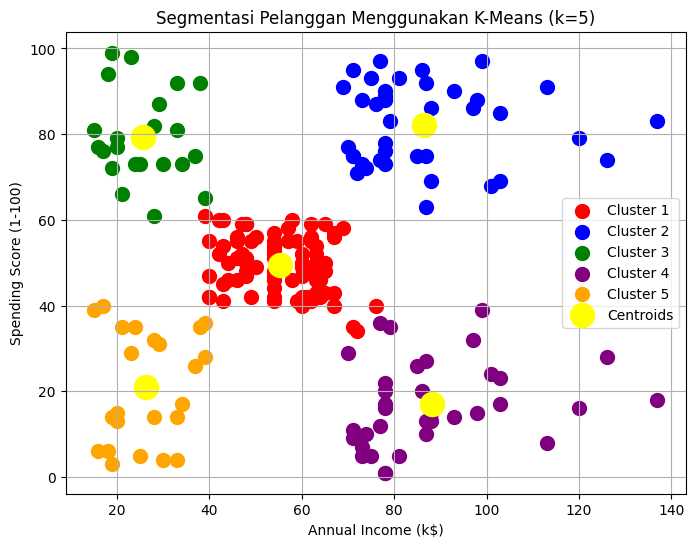

In [ ]:
# Implementing K-Means with k=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='orange', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Segmentasi Pelanggan Menggunakan K-Means (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


Gambar di atas menunjukkan hasil segmentasi pelanggan menggunakan model K-Means dengan 5 kluster berdasarkan Annual Income dan Spending Score. Tiap warna merepresentasikan kelompok pelanggan yang berbeda, dan titik kuning adalah posisi centroid dari masing-masing kluster.

## 4. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


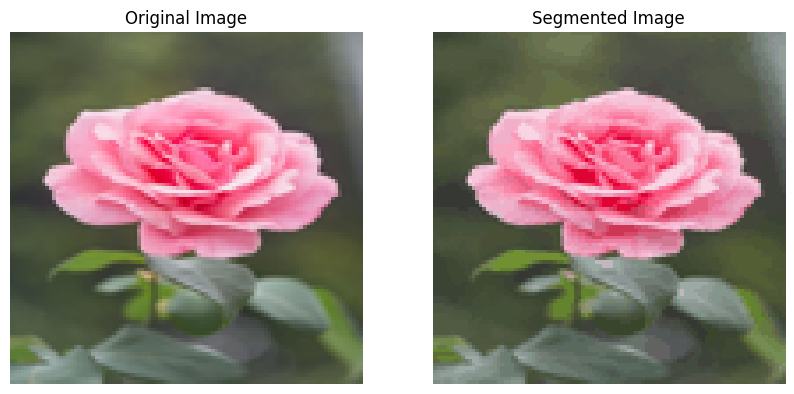

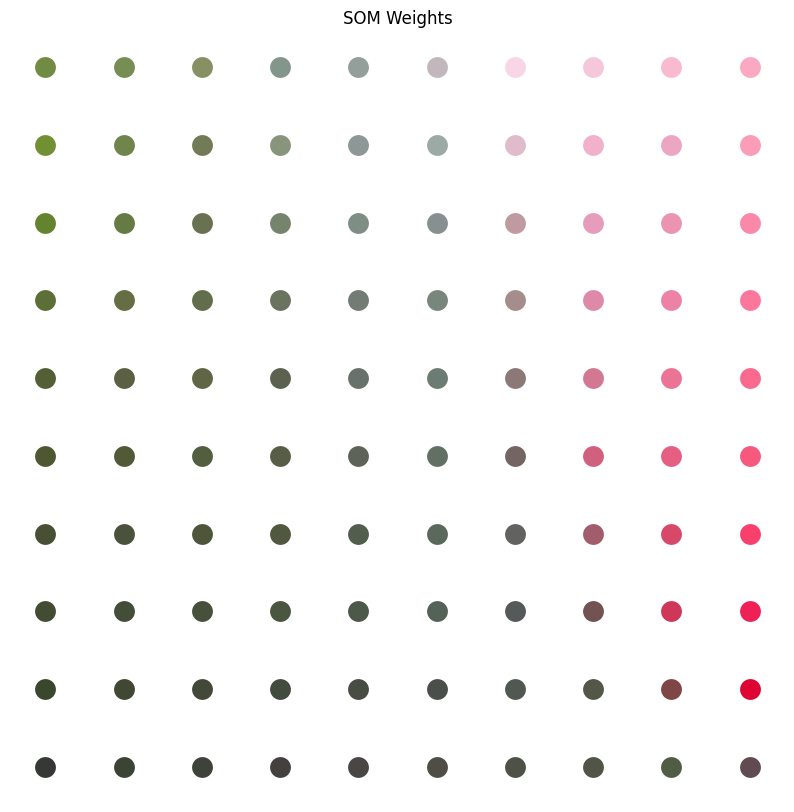

In [ ]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from PIL import Image

# Load and preprocess the image
image_path = '/content/drive/MyDrive/ML/rose_pink.png'
image = Image.open(image_path)
image = image.resize((100, 100))
pixels = np.array(image)
pixels = pixels.reshape(-1, 3) / 255.0

# Initialize and train SOM
som_shape = (10, 10)  # 10x10 SOM grid
som = MiniSom(som_shape[0], som_shape[1], 3, sigma=1.0, learning_rate=0.5)
som.train_random(pixels, 10000)  # Train for 10000 iterations

# Get the segmented image
segmented = np.zeros(pixels.shape)
for i, pixel in enumerate(pixels):
    winner = som.winner(pixel)
    segmented[i] = som.get_weights()[winner]

# Reshape back to image dimensions
segmented = segmented.reshape(image.size[1], image.size[0], 3)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(segmented)
ax2.set_title('Segmented Image')
ax2.axis('off')
plt.show()

# Visualize SOM weights
fig, ax = plt.subplots(figsize=(10, 10))
weights = som.get_weights()
for i in range(som_shape[0]):
    for j in range(som_shape[1]):
        ax.plot(i, j, 'o', markerfacecolor=weights[i, j], markersize=15, markeredgewidth=0)
ax.set_title('SOM Weights')
ax.axis('off')
plt.show()